Validation accuracy for 4 hidden units is 0.821
Validation accuracy for 16 hidden units is 0.912
Validation accuracy for 20 hidden units is 0.910
Validation accuracy for 24 hidden units is 0.907
Validation accuracy for 32 hidden units is 0.919
Validation accuracy for 48 hidden units is 0.924


C:\Users\micke\Desktop\MyMLP.py:30: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
C:\Users\micke\Desktop\MyMLP.py:30: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


Test accuracy with 48 hidden units is 0.912


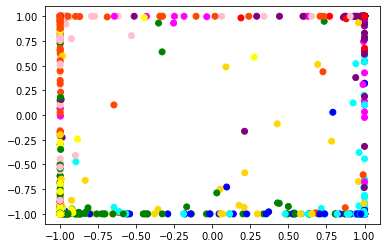

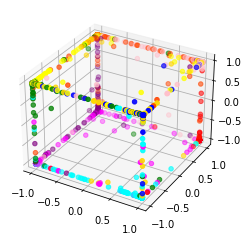

In [1]:
#import libraries
import numpy as np
from MyMLP import MLP, Normalization, process_label
from visualization import plot2d, plot3d

# read in data.
# training data
train_data = np.genfromtxt("optdigits_train.txt",delimiter=",")
train_x = train_data[:,:-1]
train_y = train_data[:,-1].astype('int')

# validation data
valid_data = np.genfromtxt("optdigits_valid.txt",delimiter=",")
valid_x = valid_data[:,:-1]
valid_y = valid_data[:,-1].astype('int')

# test data
test_data = np.genfromtxt("optdigits_test.txt",delimiter=",")
test_x = test_data[:,:-1]
test_y = test_data[:,-1].astype('int')

# normalize the data
normalizer = Normalization()
normalizer.fit(train_x)
train_x = normalizer.normalize(train_x)
valid_x = normalizer.normalize(valid_x)
test_x = normalizer.normalize(test_x)

# process training labels into one-hot vectors
train_y = process_label(train_y)

############### Problem a ###################
# experiment with different numbers of hidden units
candidate_num_hid = [4,16,20,24,32,48]
valid_accuracy = []
for i, num_hid in enumerate(candidate_num_hid):
    # initialize the model
    clf = MLP(num_hid=num_hid)
    # update the model based on training data, and record the best validation accuracy
    cur_valid_accuracy = clf.fit(train_x,train_y,valid_x,valid_y)
    valid_accuracy.append(cur_valid_accuracy)
    print('Validation accuracy for %d hidden units is %.3f' %(candidate_num_hid[i],cur_valid_accuracy))

# select the best number of hidden unit and use it to train the model
best_num_hid = candidate_num_hid[np.argmax(valid_accuracy)]
clf = MLP(num_hid=best_num_hid)
_ = clf.fit(train_x,train_y,valid_x,valid_y)

# evaluate on test data
predictions = clf.predict(test_x)
accuracy = np.count_nonzero(predictions.reshape(-1)==test_y.reshape(-1))/len(test_x)

print('Test accuracy with %d hidden units is %.3f' %(best_num_hid,accuracy))


############### Problem b ###################
# visualization for 2 hidden units
clf = MLP(num_hid=2)
_ = clf.fit(train_x,train_y,valid_x,valid_y)
# validation set visualization
hid_features = clf.get_hidden(valid_x)
plot2d(hid_features,valid_y,'valid')


# visualization for 3 hidden units
clf = MLP(num_hid=3)
_ = clf.fit(train_x,train_y,valid_x,valid_y)
# validation set visualization
hid_features = clf.get_hidden(valid_x)
plot3d(hid_features,valid_y,'valid')
